In [64]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Circle,Wedge
from  matplotlib import cm
from matplotlib import font_manager as fm
from scipy.io import loadmat
import pandas as pd

D:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


## Patches
patches是二维图形类，很多类的父类
[所有子类](https://matplotlib.org/stable/api/patches_api.html)
![](https://matplotlib.org/stable/_images/inheritance-ecef1d6fc5ffec0460463869049eb0c708a450cc.png)

三种最常见子类：
- Rectangle
    - hist
    - bar
- Polygon
- Wedge

### 1. Rectangle
**Definition:**
过锚点xy及其宽度和高度生成。 Rectangle本身的主要比较简单，即xy控制锚点，width和height分别控制宽和高。

#### Hist
- x: 数据集，最终的直方图将对数据集进行统计

- bins: 统计的区间分布

- range: tuple, 显示的区间，range在没有给出bins时生效

- density: bool，默认为false，显示的是频数统计结果，为True则显示频率统计结果，这里需要注意，频率统计结果=区间数目/(总数*区间宽度)，和normed效果一致，官方推荐使用density

- histtype: 可选`{'bar', 'barstacked', 'step', 'stepfilled'}`之一，默认为bar，推荐使用默认配置，step使用的是梯状，stepfilled则会对梯状内部进行填充，效果与bar类似

- align: 可选`{'left', 'mid', 'right'}`之一，默认为'mid'，控制柱状图的水平分布，left或者right，会有部分空白区域，推荐使用默认

- log: bool，默认False,即y坐标轴是否选择指数刻度

- stacked: bool，默认为False，是否为堆积状图

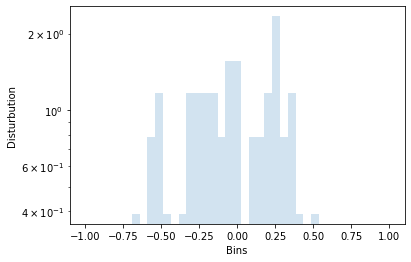

In [49]:
bins=np.linspace(-1,1,40)
x=np.random.normal(0,0.3,50)
plt.hist(x,bins,density=True,alpha=0.2,log=True) #alpha设置透明度，0为完全透明
plt.xlabel('Bins')
plt.ylabel('Disturbution');

### Bar
- left：x轴的位置序列，一般采用range函数产生一个序列，但是有时候可以是字符串

- height：y轴的数值序列，也就是柱形图的高度，一般就是我们需要展示的数据；

- alpha：透明度，值越小越透明

- width：为柱形图的宽度，一般这是为0.8即可；

- color或facecolor：柱形图填充的颜色；

- edgecolor：图形边缘颜色

- label：解释每个图像代表的含义，这个参数是为legend()函数做铺垫的，表示该次bar的标签

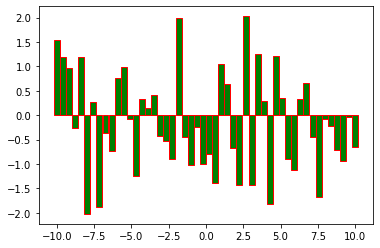

In [61]:
x=np.linspace(-10,10,50)
y=np.random.normal(0,1,50)
plt.bar(x,y,width=0.4,color='green',edgecolor='red');

## Polygon
xy是一个N×2的numpy array，为多边形的顶点。
closed为True则指定多边形将起点和终点重合从而显式关闭多边形。

matplotlib.patches.Polygon类中常用的是fill类，它是基于xy绘制一个填充的多边形

制作数据x的饼图，每个楔子的面积用x/sum(x)表示。
其中最主要的参数是前4个：

x：契型的形状，一维数组。

explode：如果不是等于None，则是一个len(x)数组，它指定用于偏移每个楔形块的半径的分数。

labels：用于指定每个契型块的标记，取值是列表或为None。

colors：饼图循环使用的颜色序列。如果取值为None，将使用当前活动循环中的颜色。

startangle：饼状图开始的绘制的角度。

In [66]:
data = loadmat('Salinas_corrected.mat')['salinas_corrected']
label = loadmat('Salinas_gt.mat')['salinas_gt']

global GROUND_TRUTH
global NUM_CLASSES
GROUND_TRUTH = ['Background', 'Brocoli_green_weeds_1', 'Brocoli_green_weeds_2', 'Fallow', 'Fallow_rough_plow',
                        'Fallow_smooth', 'Stubble', 'Celery', 'Grapes_untrained', 'Soil_vinyard_develop',
                        'Corn_senesced_green_weeds', 'Lettuce_romaine_4wk', 'Lettuce_romaine_5wk',
                        'Lettuce_romaine_6wk', 'Lettuce_romaine_7wk', 'Vinyard_untrained', 'Vinyard_vertical_trellis']

NUM_CLASSES = len(GROUND_TRUTH) - 1
classes = pd.DataFrame(columns=['label', 'name', 'samples'])
data_reshaped = data.reshape(-1, data.shape[-1])
label_reshaped = label.flatten()
for sample in label_reshaped:
    if not any(classes.label == sample):
        classes.loc[len(classes)] = [sample, GROUND_TRUTH[sample], 1]
    else:
        classes['samples'].loc[classes.loc[classes.label == sample].index[0]] += 1
classes = classes.sort_values(by=['label']).reset_index(drop=True)

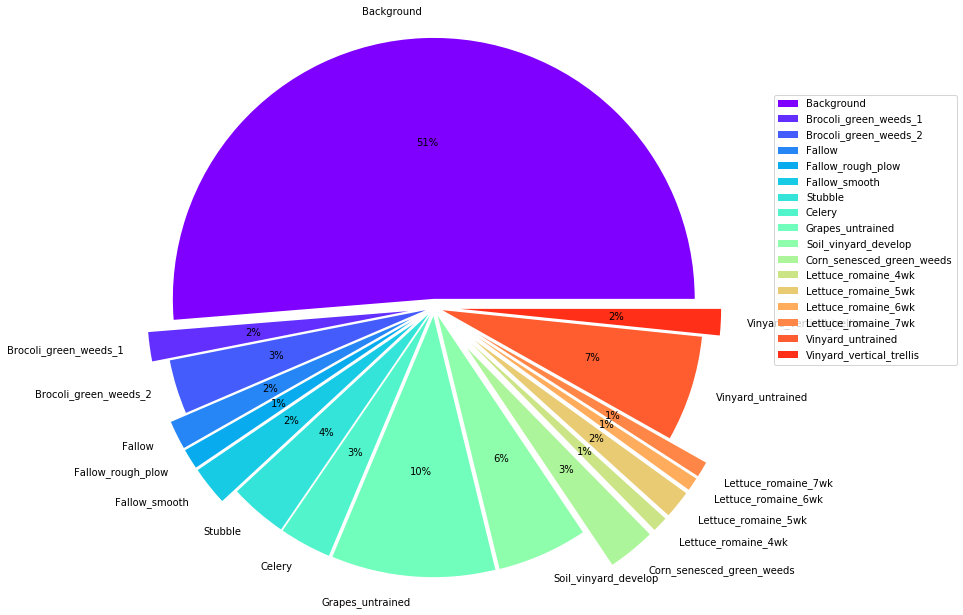

In [67]:
explode=(0.1,0.3,0.1,0.3,0.3,0.3,0.1,0.1,0.1,0.1,0.6,0.6,0.6,0.6,0.6,0.1,0.3)
colors = cm.rainbow(np.arange(len(classes))/len(classes))
plt.gca().axis("equal")
patches, texts, autotexts = plt.pie(classes['samples'], labels=classes['name'],explode=explode,wedgeprops={'linewidth':5},radius=3,autopct='%.f%%',colors=colors)
proptease = fm.FontProperties()
proptease.set_size('medium')

plt.setp(autotexts, fontproperties=proptease)
plt.setp(texts, fontproperties=proptease)
plt.legend(GROUND_TRUTH, bbox_to_anchor=(1.5,1.5), loc="upper left")
plt.show()